<a href="https://colab.research.google.com/github/rumbie-1/assignment-2/blob/main/Copy_of_Assignment_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive 
drive.mount('/content/drive/')
import pandas as pd
import matplotlib.pyplot as plt
import numpy as  np
#from sKlearn import metrics


Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Telecom.csv')

df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

In [ ]:
columns = df.iloc[:0,:]

In [ ]:
label_encoder= LabelEncoder()
hot_encoder= OneHotEncoder()

In [ ]:
for i in columns:
  df[i]= label_encoder.fit_transform(df[i])
  from google.colab import data_table
data_table.DataTable(df)


In [ ]:
correlation = df.corr()

In [ ]:
corr_values = correlation['Churn'].sort_values()
corr_values

Contract           -0.396713
tenure             -0.352229
OnlineSecurity     -0.289309
TechSupport        -0.282492
OnlineBackup       -0.195525
DeviceProtection   -0.178134
Dependents         -0.164221
Partner            -0.150448
InternetService    -0.047291
StreamingMovies    -0.038492
StreamingTV        -0.036581
customerID         -0.017447
gender             -0.008612
PhoneService        0.011942
TotalCharges        0.014479
MultipleLines       0.038037
PaymentMethod       0.107062
SeniorCitizen       0.150889
MonthlyCharges      0.183523
PaperlessBilling    0.191825
Churn               1.000000
Name: Churn, dtype: float64

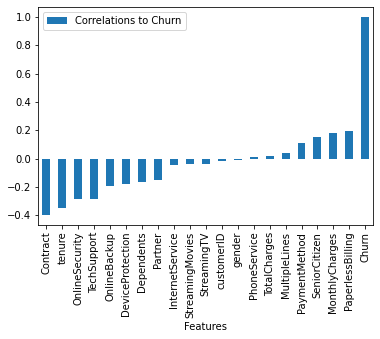

In [ ]:
corr_values.plot(kind='bar', xlabel= 'Features',label='Correlations to Churn')
plt.rcParams['figure.figsize']=[10,10]
plt.legend ()

In [ ]:
X = df[['PaperlessBilling', 'MonthlyCharges', 'SeniorCitizen',
                   'PaymentMethod', 'MultipleLines', 'TotalCharges', 'PhoneService']]
y = pd.DataFrame(df['Churn'])


In [ ]:
X

,PaperlessBilling,MonthlyCharges,SeniorCitizen,PaymentMethod,MultipleLines,TotalCharges,PhoneService
0,1,142,0,2,1,2505,0
1,0,498,0,3,0,1466,1
2,1,436,0,3,0,157,1
3,0,266,0,0,1,1400,0
4,1,729,0,2,0,925,1
...,...,...,...,...,...,...,...
7038,1,991,0,3,2,1597,1
7039,1,1340,0,1,2,5698,1
7040,1,137,0,2,1,2994,0
7041,1,795,1,3,2,2660,1


In [ ]:
y

,Churn
0,0
1,0
2,1
3,0
4,1
...,...
7038,0
7039,0
7040,0
7041,1


In [ ]:
from sklearn.metrics import mean_squared_error
import numpy as np
import xgboost as xgb

In [ ]:
df_dmatrix = xgb.DMatrix(data=X,label=y)

NameError: ignored

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

In [ ]:
model = xgb.XGBClassifier(objective='binary:logistic', colsample_bytree=0.3, 
                           learning_rate=0.1, max_depth=5, alpha=10, n_estimators=10)

In [ ]:
X_train = np.array(X_train)
y_train = np.array(y_train)

In [ ]:
model.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


XGBClassifier(alpha=10, base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.3, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=5,
              min_child_weight=1, missing=None, n_estimators=10, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [ ]:
 predictions = model.predict(X_test)

In [ ]:
rmse = np.sqrt(mean_squared_error(y_test, predictions))

In [ ]:
rmse

0.5301418587017671

In [ ]:
#k-fold cross validation using cv() method
parameters = {'objective':'reg:squarederror', 'colsample_bytree':'0.3', 
                           'learning_rate':'0.1', 'max_depth':'5', 'alpha':'10'}
results = xgb.cv(dtrain=df_dmatrix, params=parameters, nfold=3, num_boost_round=100,
                early_stopping_rounds=10, metrics='rmse', as_pandas=True, seed=123)

In [ ]:
#rmse reduced 
results['train-rmse-mean'].tail()


95    0.391857
96    0.391507
97    0.391481
98    0.391459
99    0.391458
Name: train-rmse-mean, dtype: float64

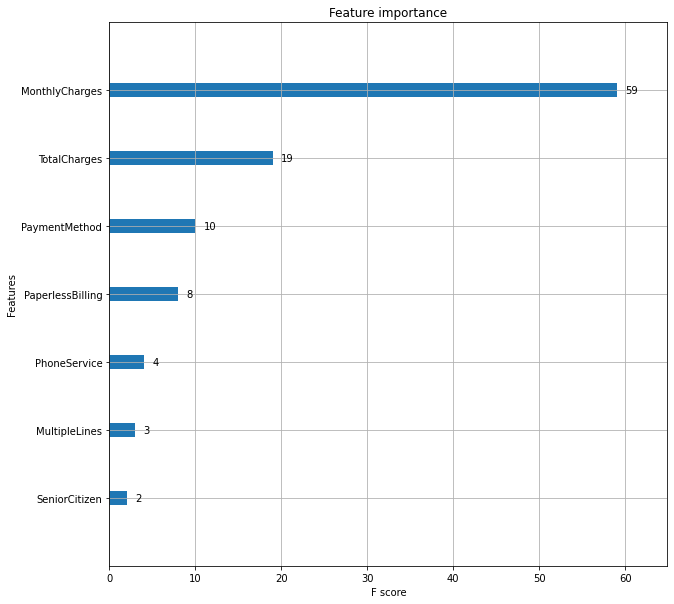

In [ ]:
xgb.plot_importance(model)
plt.rcParams['figure.figsize'] = [5, 5]
plt.show()

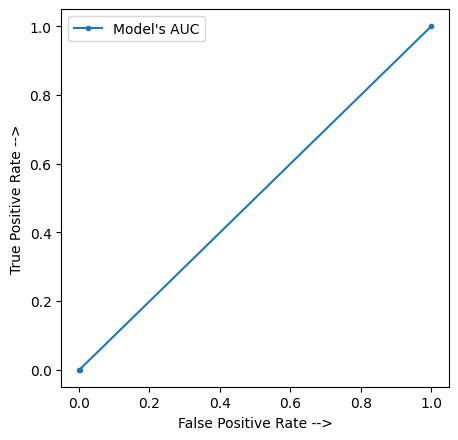

In [ ]:
#evaluating model's auc
from sklearn.metrics import roc_curve, auc, accuracy_score

xgb_fpr, xgb_tpr, threshold = roc_curve(y_test, predictions)
auc_xgb = auc(xgb_fpr, xgb_tpr)

plt.figure(figsize=(5,5), dpi=100)
plt.plot(xgb_fpr, xgb_tpr, marker='.', label="Model's AUC")

plt.xlabel('False Positive Rate -->')
plt.ylabel('True Positive Rate -->')

plt.legend()
plt.show()

In [ ]:
#calculating accuracy of model
accuracy = accuracy_score(y_test, predictions)
print('Accuracy : ', accuracy*100, '%')

Accuracy :  71.89496096522356 %


In [ ]:
import pickle
pickle_out = open('model.pkl', mode='wb')
pickle.dump(model, pickle_out)
pickle_out.close()

In [ ]:
import joblib

In [ ]:
classification= joblib.load('model.pkl')

In [ ]:
c = [1, 142, 0, 2, 1, 2505, 0]
c = pd.DataFrame(c)
x = model.predict(c)
c

In [ ]:
predictions

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
c = X.iloc[:1,:]

In [ ]:
pr = model.predict(c)

In [ ]:
pr

array([0])

In [ ]:
c

,PaperlessBilling,MonthlyCharges,SeniorCitizen,PaymentMethod,MultipleLines,TotalCharges,PhoneService
0,1,142,0,2,1,2505,0


In [ ]:
X

,PaperlessBilling,MonthlyCharges,SeniorCitizen,PaymentMethod,MultipleLines,TotalCharges,PhoneService
0,1,142,0,2,1,2505,0
1,0,498,0,3,0,1466,1
2,1,436,0,3,0,157,1
3,0,266,0,0,1,1400,0
4,1,729,0,2,0,925,1
...,...,...,...,...,...,...,...
7038,1,991,0,3,2,1597,1
7039,1,1340,0,1,2,5698,1
7040,1,137,0,2,1,2994,0
7041,1,795,1,3,2,2660,1
